In [19]:
#import packages
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

In [20]:
x = torch.linspace(-1, 1, 400) #define the x
x = torch.unsqueeze(x, 1) #reshape x
y = (np.sin(5*np.pi*x))/(5*np.pi*x) #define the non linear sin function

length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent variable')

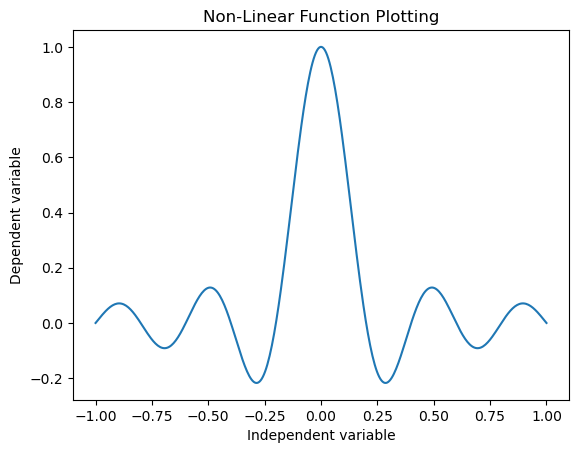

In [21]:
print('length of x:',x.shape)
print('length of y:',y.shape)
plt.plot(x, y)
plt.title('Non-Linear Function Plotting')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

In [22]:
class DNN1(nn.Module): #define the deep neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 5)   #7 hidden layer
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 9)
        self.hiddenlayer7 = nn.Linear(9, 5)

        self.output = nn.Linear(5, 1)   #1 output layer

        
    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))

        x = self.output(x)            
        return x     
        

model1 = DNN1() #defining the model

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in DNN Model 1:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model1.state_dict():
    print(par, "\t",model1.state_dict()[par])

Number of parameters in DNN Model 1: 555

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.2548],
        [-0.0788],
        [-0.1072],
        [ 0.7117],
        [-0.3148]])
hiddenlayer1.bias 	 tensor([-0.6090,  0.8004, -0.0141,  0.7398, -0.3694])
hiddenlayer2.weight 	 tensor([[-0.0810, -0.0597, -0.1343,  0.2178,  0.2066],
        [-0.1033,  0.0267, -0.2263, -0.1994,  0.1227],
        [-0.1126, -0.0790, -0.3791, -0.2466,  0.1156],
        [ 0.3308, -0.2082, -0.1163,  0.2760, -0.1595],
        [-0.1688,  0.0338, -0.0067,  0.2321,  0.2314],
        [ 0.1248,  0.2701,  0.1072, -0.0213,  0.3084],
        [ 0.2862, -0.3821, -0.2717,  0.1186,  0.0044],
        [-0.2078,  0.4275, -0.1323,  0.1005,  0.3810],
        [ 0.0538,  0.3468, -0.1104,  0.1817,  0.2113],
        [ 0.4038,  0.1078,  0.3372,  0.0149,  0.0220]])
hiddenlayer2.bias 	 tensor([-0.2437,  0.1305, -0.1258,  0.0437,  0.4428, -0.4074,  0.1421,  0.1337,
        -0.3943,  0.4168])
hiddenlayer3.weight 	 ten

In [23]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        prediction = model(x)      # for each x it the modedl predicts
        loss = loss_function(prediction, y) #calculate the loss
        optimizer.zero_grad()  #clearing gradients for next training, otherwise it provides wrong result
        loss.backward()         # backpropagation for computing gradients
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [24]:
x = torch.tensor(x, dtype= torch.float32)
y = torch.tensor(y, dtype= torch.float32)

/local_scratch/slurm.699568/ipykernel_2254061/3347147251.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype= torch.float32)
/local_scratch/slurm.699568/ipykernel_2254061/3347147251.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype= torch.float32)


In [25]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.0869
epoch: 200, loss = 0.0868
epoch: 300, loss = 0.0270
epoch: 400, loss = 0.0080
epoch: 500, loss = 0.0073
epoch: 600, loss = 0.0061
epoch: 700, loss = 0.0058
epoch: 800, loss = 0.0049
epoch: 900, loss = 0.0025
epoch: 1000, loss = 0.0014
Converged: 0.0009950042


Text(0, 0.5, 'Loss')

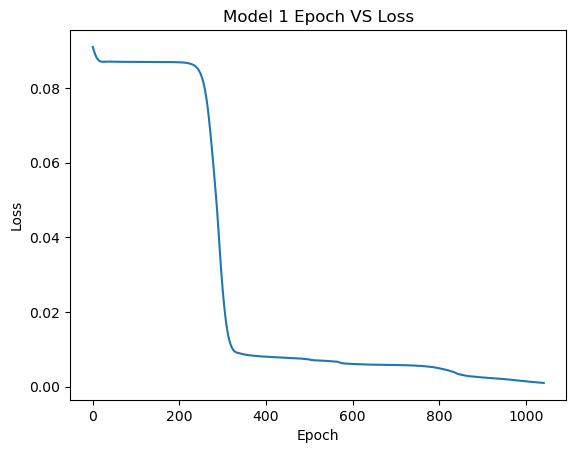

In [26]:
plt.plot(Model1epoch_array,Model1loss_array)
plt.title("Model 1 Epoch VS Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1 prediction comparison with the actual function')

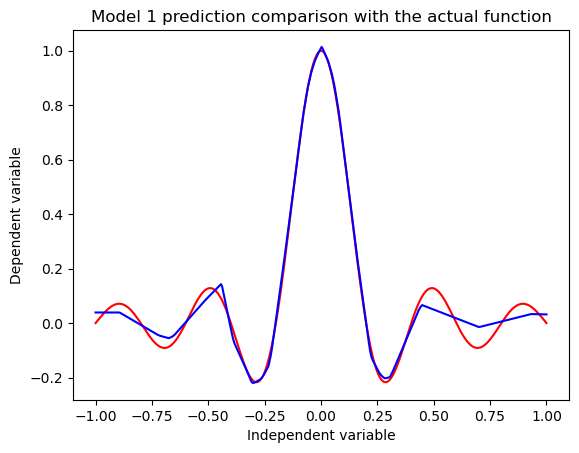

In [27]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the predicted function
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1 prediction comparison with the actual function")
           

In [28]:
class DNN2(nn.Module): #define the second deep neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 5)   #5 hidden layer
        self.hiddenlayer2 = nn.Linear(5, 12)
        self.hiddenlayer3 = nn.Linear(12, 15)
        self.hiddenlayer4 = nn.Linear(15, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)


        self.output = nn.Linear(10, 1)   #1 output layer

        
    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))

        x = self.output(x)            
        return x     
        

model2 = DNN2() #defining the model

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.0003)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in DNN Model 2:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model2.state_dict():
    print(par, "\t",model2.state_dict()[par])

Number of parameters in DNN Model 2: 558

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.9848],
        [ 0.5210],
        [ 0.5944],
        [ 0.0227],
        [-0.5489]])
hiddenlayer1.bias 	 tensor([ 0.6477, -0.6213,  0.4770,  0.9746,  0.7736])
hiddenlayer2.weight 	 tensor([[ 1.1298e-01, -6.7093e-02, -2.1411e-01,  2.7268e-01,  1.3142e-01],
        [-3.2500e-01, -1.6057e-01, -1.2554e-01,  3.9562e-01,  1.2992e-01],
        [ 4.1675e-01,  3.6103e-01,  3.3775e-01, -3.9762e-01,  9.9002e-02],
        [-1.4621e-01, -3.5541e-01,  6.7978e-04, -1.6467e-01, -2.3848e-01],
        [ 2.6088e-01,  3.6340e-01, -3.0179e-01, -8.5960e-02,  1.4087e-01],
        [-1.0016e-01, -8.3587e-02, -4.1697e-01, -1.9822e-01, -3.5529e-01],
        [ 1.4997e-01, -2.7894e-01,  1.1527e-01, -1.0550e-01, -4.1362e-01],
        [ 1.0447e-01, -1.4352e-02,  3.3433e-01,  4.1650e-01, -8.7439e-02],
        [-2.8051e-01,  2.8395e-01,  4.1798e-01, -3.7031e-01, -5.2944e-02],
        [-4.7128e-05,  2.061

In [29]:
Model2epoch_array, Model2loss_array, Model2prediction = testing (model2, x, y)

epoch: 100, loss = 0.0073
epoch: 200, loss = 0.0058
epoch: 300, loss = 0.0058
epoch: 400, loss = 0.0058
epoch: 500, loss = 0.0058
epoch: 600, loss = 0.0058
epoch: 700, loss = 0.0058
epoch: 800, loss = 0.0058
epoch: 900, loss = 0.0058
epoch: 1000, loss = 0.0058
epoch: 1100, loss = 0.0058
epoch: 1200, loss = 0.0058
epoch: 1300, loss = 0.0059
epoch: 1400, loss = 0.0063
epoch: 1500, loss = 0.0058
epoch: 1600, loss = 0.0058
epoch: 1700, loss = 0.0058
epoch: 1800, loss = 0.0060
epoch: 1900, loss = 0.0058
epoch: 2000, loss = 0.0058
epoch: 2100, loss = 0.0058
epoch: 2200, loss = 0.0058
epoch: 2300, loss = 0.0058
epoch: 2400, loss = 0.0057
epoch: 2500, loss = 0.0057
epoch: 2600, loss = 0.0058
epoch: 2700, loss = 0.0058
epoch: 2800, loss = 0.0057
epoch: 2900, loss = 0.0057
epoch: 3000, loss = 0.0057
epoch: 3100, loss = 0.0057
epoch: 3200, loss = 0.0058
epoch: 3300, loss = 0.0058
epoch: 3400, loss = 0.0057
epoch: 3500, loss = 0.0059
epoch: 3600, loss = 0.0058
epoch: 3700, loss = 0.0058
epoch: 380

Text(0, 0.5, 'Loss')

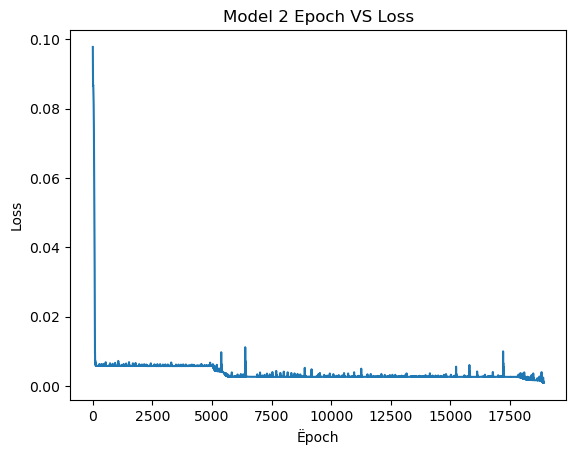

In [30]:
plt.plot(Model2epoch_array, Model2loss_array)
plt.title("Model 2 Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1 and Model 2 prediction comparison with the actual function')

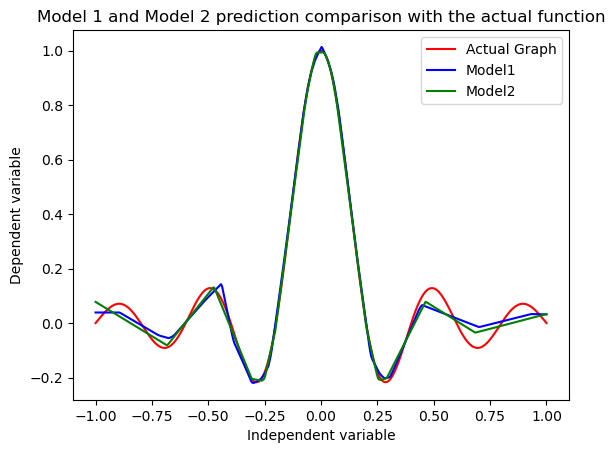

In [31]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the 1st model predicted function
plt.plot(x.numpy(), Model2prediction.data.numpy(), color= "Green") #plot the 2nd model predicted function
plt.legend(['Actual Graph', 'Model1', 'Model2'])
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1 and Model 2 prediction comparison with the actual function")

In [32]:
class SNN1(nn.Module): #define the shallow neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 26)   #2 hidden layer
        self.hiddenlayer2 = nn.Linear(26, 18)

        self.output = nn.Linear(18, 1)   #1 output layer

        
    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))


        x = self.output(x)            
        return x     
        

model3 = SNN1() #defining the model

optimizer = torch.optim.Adam(model3.parameters(), lr=0.003, weight_decay = 0.00015)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in SNN Model 1:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model3.state_dict():
    print(par, "\t",model3.state_dict()[par])

Number of parameters in SNN Model 1: 557

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.2452],
        [ 0.4868],
        [ 0.2165],
        [-0.0369],
        [-0.4522],
        [ 0.1893],
        [-0.3791],
        [ 0.9417],
        [ 0.5678],
        [-0.5880],
        [ 0.2091],
        [ 0.1176],
        [ 0.2173],
        [-0.0246],
        [-0.9361],
        [-0.2213],
        [ 0.3159],
        [ 0.5731],
        [-0.1424],
        [-0.6527],
        [ 0.1648],
        [-0.0864],
        [-0.7271],
        [-0.2109],
        [-0.7687],
        [-0.9786]])
hiddenlayer1.bias 	 tensor([-0.9057,  0.8455, -0.7820, -0.9397,  0.3439,  0.7684,  0.4648,  0.7638,
         0.2101, -0.0587,  0.5497, -0.9549, -0.6329, -0.4735, -0.4579, -0.5838,
         0.2591,  0.7182, -0.9906, -0.9454, -0.0317, -0.1238,  0.6239, -0.2151,
        -0.7864, -0.0862])
hiddenlayer2.weight 	 tensor([[ 3.9460e-02,  1.6512e-01, -6.9772e-02,  8.9930e-02, -1.7055e-01,
         -1.1631e

In [33]:
Model3epoch_array, Model3loss_array, Model3prediction = testing (model3, x, y)

epoch: 100, loss = 0.0487
epoch: 200, loss = 0.0056
epoch: 300, loss = 0.0040
epoch: 400, loss = 0.0036
epoch: 500, loss = 0.0033
epoch: 600, loss = 0.0021
epoch: 700, loss = 0.0017
epoch: 800, loss = 0.0016
epoch: 900, loss = 0.0015
epoch: 1000, loss = 0.0015
epoch: 1100, loss = 0.0015
epoch: 1200, loss = 0.0015
epoch: 1300, loss = 0.0015
epoch: 1400, loss = 0.0015
epoch: 1500, loss = 0.0015
epoch: 1600, loss = 0.0015
epoch: 1700, loss = 0.0015
epoch: 1800, loss = 0.0015
epoch: 1900, loss = 0.0015
epoch: 2000, loss = 0.0015
epoch: 2100, loss = 0.0015
epoch: 2200, loss = 0.0015
epoch: 2300, loss = 0.0015
epoch: 2400, loss = 0.0015
epoch: 2500, loss = 0.0015
epoch: 2600, loss = 0.0015
epoch: 2700, loss = 0.0015
epoch: 2800, loss = 0.0015
epoch: 2900, loss = 0.0014
epoch: 3000, loss = 0.0014
epoch: 3100, loss = 0.0015
epoch: 3200, loss = 0.0015
epoch: 3300, loss = 0.0015
epoch: 3400, loss = 0.0016
epoch: 3500, loss = 0.0014
epoch: 3600, loss = 0.0015
epoch: 3700, loss = 0.0014
epoch: 380

Text(0, 0.5, 'Loss')

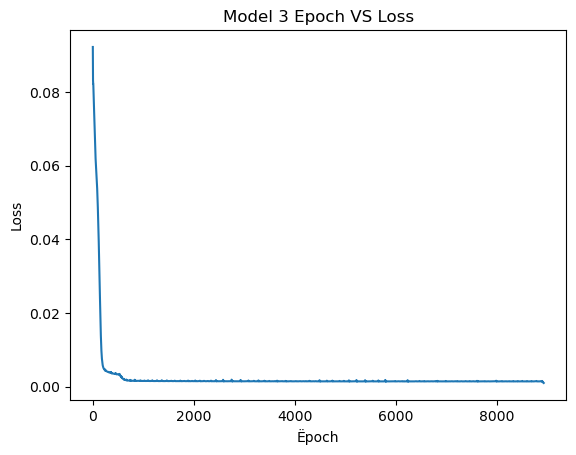

In [34]:
plt.plot(Model3epoch_array, Model3loss_array)
plt.title("Model 3 Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1, 2 and 3 prediction comparison with the actual function')

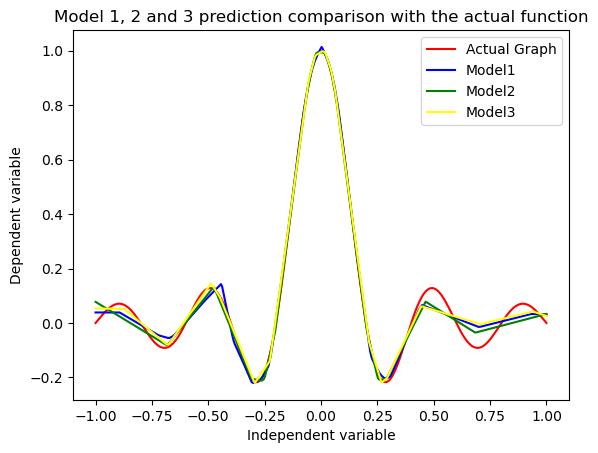

In [35]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the 1st model predicted function
plt.plot(x.numpy(), Model2prediction.data.numpy(), color= "Green") #plot the 2nd model predicted function
plt.plot(x.numpy(), Model3prediction.data.numpy(), color= "Yellow") #plot the 3nd model predicted function
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1, 2 and 3 prediction comparison with the actual function")

Text(0, 0.5, 'Loss')

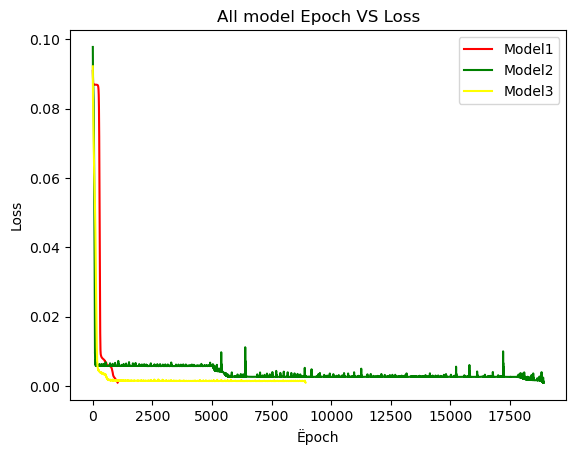

In [36]:
plt.plot(Model1epoch_array, Model1loss_array, color= "Red")
plt.plot(Model2epoch_array, Model2loss_array, color= "Green")
plt.plot(Model3epoch_array, Model3loss_array, color= "Yellow")
plt.legend(['Model1', 'Model2','Model3'])
plt.title("All model Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")